## This notebook presents general  [...]

In [364]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Vaccination percentage in the USA

In [365]:
df = pd.read_csv('input_data/COVID-19_Vaccination_Demographics_in_the_United_States_National.csv')

In [366]:
df

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
0,06/01/2022,Sex_Male,122617815,47.8,47.4,104625213,75.0,64.0,47.6,47.3,46.5,45.2,47.5,44.5,46619794,238269
1,06/01/2022,Ages_25-39_yrs,54879047,21.2,21.2,45947195,80.2,67.2,20.8,20.8,36.5,16.2,21.6,15.4,16789932,82675
2,06/01/2022,Race_eth_NHAsian,12937958,6.7,5.0,11726279,68.1,61.7,6.8,5.3,70.2,8.3,6.6,9.4,7673846,44756
3,06/01/2022,Sex_known,256380339,99.9,99.1,219822373,NaN,NaN,99.9,99.3,48.8,99.9,99.9,99.9,103145922,535522
4,06/01/2022,Race_eth_NHNHOPI,620786,0.3,0.2,561584,66.8,60.5,0.3,0.3,49.0,0.3,0.3,0.3,258829,1644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,12/13/2020,Ages_25-39_yrs,4926,17.9,17.9,1140,0.0,0.0,16.7,16.7,0.0,0.0,16.8,0.0,0,0
16076,12/13/2020,Race_eth_NHAIAN,289,1.4,1.0,45,0.0,0.0,0.9,0.7,0.0,0.0,0.9,0.0,0,0
16077,12/13/2020,US,27528,NaN,100.0,6809,0.0,0.0,NaN,100.0,0.0,NaN,100.0,NaN,0,0
16078,12/13/2020,Race_eth_NHNHOPI,44,0.2,0.2,11,0.0,0.0,0.2,0.2,0.0,0.0,0.2,0.0,0,0


In [367]:
df_usa = df.loc[df['Demographic_category'] == 'US']

In [368]:
df_usa

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
18,06/01/2022,US,258655540,NaN,100.0,221350544,77.9,66.7,NaN,100.0,48.5,NaN,100.0,NaN,103334295,536206
44,05/31/2022,US,258655540,NaN,100.0,221350544,77.9,66.7,NaN,100.0,48.5,NaN,100.0,NaN,103334295,609647
71,05/30/2022,US,258651246,NaN,100.0,221346563,77.9,66.7,NaN,100.0,48.5,NaN,100.0,NaN,103329913,676190
105,05/29/2022,US,258647864,NaN,100.0,221344267,77.9,66.7,NaN,100.0,48.5,NaN,100.0,NaN,103326241,741934
141,05/28/2022,US,258633507,NaN,100.0,221333039,77.9,66.7,NaN,100.0,48.5,NaN,100.0,NaN,103308059,790738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15945,12/17/2020,US,499442,NaN,100.0,8439,0.2,0.0,NaN,100.0,0.0,NaN,100.0,NaN,0,0
15969,12/16/2020,US,232945,NaN,100.0,7667,0.1,0.0,NaN,100.0,0.0,NaN,100.0,NaN,0,0
16011,12/15/2020,US,77985,NaN,100.0,7207,0.0,0.0,NaN,100.0,0.0,NaN,100.0,NaN,0,0
16032,12/14/2020,US,31981,NaN,100.0,6939,0.0,0.0,NaN,100.0,0.0,NaN,100.0,NaN,0,0


In [396]:
x = df_usa['Date'].values

x = list(x)
x.reverse()

In [397]:
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp

In [398]:
total_pop = 329.5 * 1000000
y = list(df_usa['Series_Complete_Yes'].values)
y2 = list(df_usa['Booster_Doses_Yes'].values)
y.reverse()
y2.reverse()

x2_start = 0
x2 = list()
yn = list()
yn2 = list()
for vax_no in y:
    yn.append((vax_no/total_pop) * 100)
for idx, vax_no in enumerate(y2):
    if (x2_start == 0 and vax_no > 100000):
        x2_start = 1
    if (x2_start == 1):
        yn2.append((vax_no/total_pop) * 100)
        x2.append(x[idx])

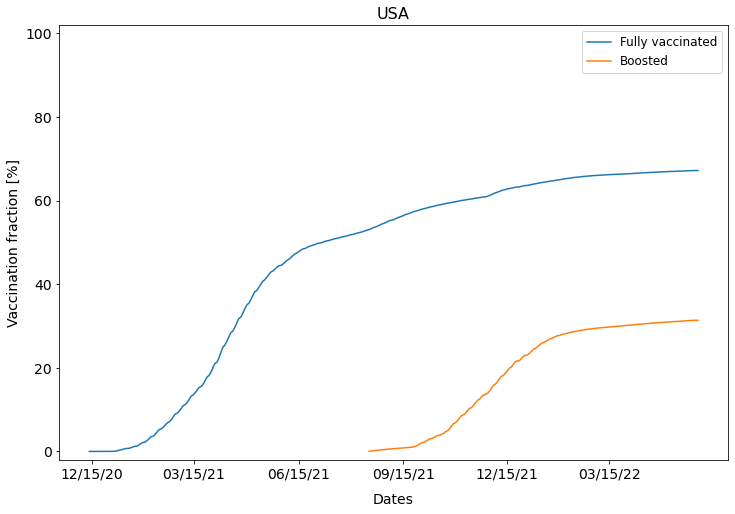

In [400]:
plt.plot(x, yn, label = "Fully vaccinated")
plt.plot(x2, yn2, label = "Boosted")

plt.title("USA", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.ylim([-2, 102])
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig('vax_usa.png')

### Vaccination percentage in counties with highest and lowest vaccination rate

In [408]:
df2 = pd.read_csv('input_data/COVID-19_Vaccinations_in_the_United_States_County.csv')

/home/joanna_len/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [409]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK')]

In [410]:
df2_tmp.loc[df2_tmp['Booster_Doses_Vax_Pct'] == max(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
227,06/01/2022,31071,22,Garfield County,NE,90.7,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,1969.0,1864.0,253.0,1745.0,1611.0,575.0


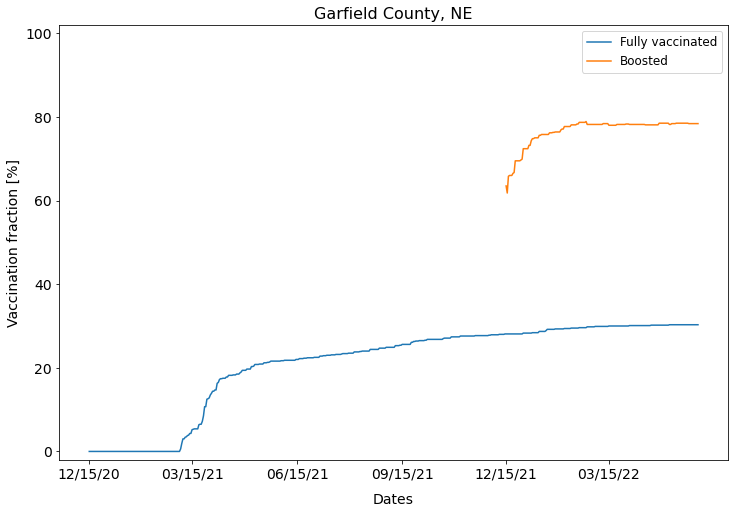

In [412]:
df_booster_max = df2.loc[df2['FIPS'] == '31071']

x = list(df_booster_max['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_max['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_max['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Garfield County, NE", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig('garfield_max_booster.png')

In [417]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK') & (df2['FIPS'] != '31071')]

In [418]:
df2_tmp.loc[df2_tmp['Booster_Doses_Vax_Pct'] == max(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
1103,06/01/2022,31125,22,Nance County,NE,90.7,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,3519.0,3318.0,575.0,3021.0,2743.0,767.0


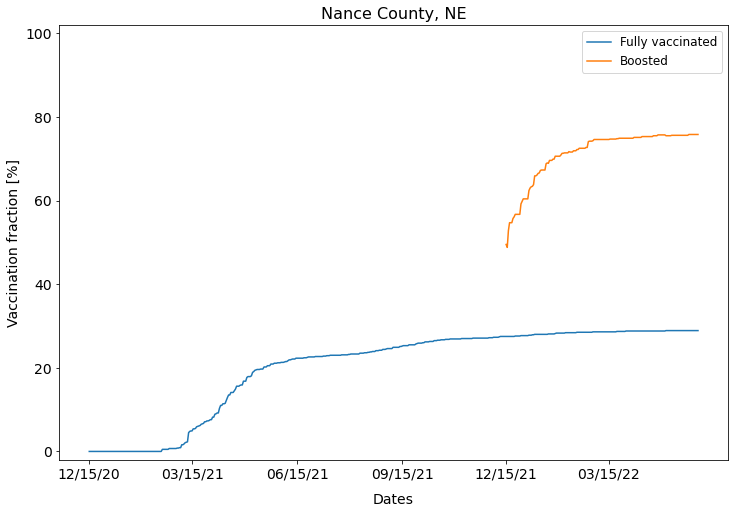

In [421]:
df_booster_max = df2.loc[df2['FIPS'] == '31125']

x = list(df_booster_max['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_max['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_max['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Nance County, NE", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig('nance_max_booster.png')

In [422]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK') & (df2['Recip_State'] != 'NE')]

In [423]:
df2_tmp.loc[df2_tmp['Booster_Doses_Vax_Pct'] == max(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
1030,06/01/2022,30055,22,McCone County,MT,95.8,308.0,18.5,308.0,19.6,...,8.0,8.0,8.0,8.0,1664.0,1571.0,258.0,1440.0,1313.0,451.0


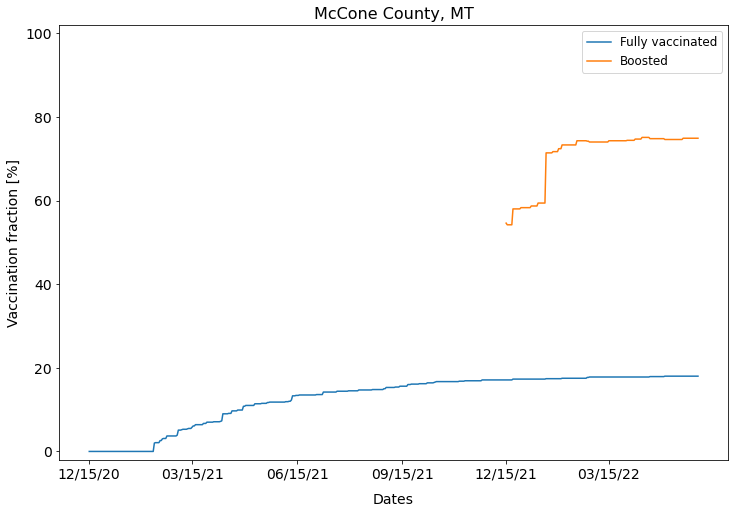

In [424]:
df_booster_max = df2.loc[df2['FIPS'] == '30055']

x = list(df_booster_max['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_max['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_max['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("McCone County, MT", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig('mccone_max_booster.png')

In [425]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK') & (df2['Series_Complete_Pop_Pct'] > df2['Booster_Doses_Vax_Pct'])]

In [426]:
df2_tmp.loc[df2_tmp['Series_Complete_Pop_Pct'] == max(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
606,06/01/2022,36083,22,Rensselaer County,NY,97.6,124776.0,78.6,124740.0,82.8,...,4.0,4.0,4.0,3.0,158714.0,150669.0,22594.0,138560.0,128075.0,27805.0
2818,06/01/2022,44007,22,Providence County,RI,88.8,513067.0,80.3,513012.0,85.1,...,4.0,4.0,4.0,3.0,638931.0,602635.0,94578.0,553185.0,508057.0,99783.0


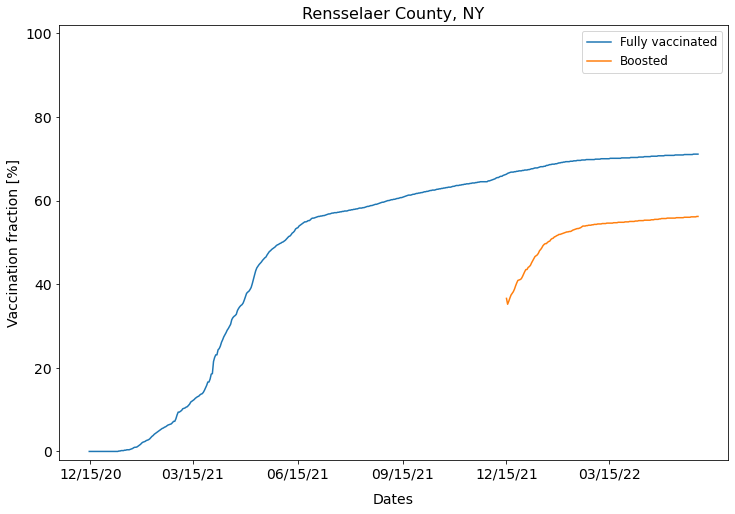

In [428]:
df_booster_max = df2.loc[df2['FIPS'] == '36083']

x = list(df_booster_max['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_max['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_max['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Rensselaer County, NY", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig('rensselaer_max_booster.png')

In [429]:
# Total
print(len(df2.loc[(df2['Date'] == '05/15/2022')]))

# With missing data
print(len(df2.loc[(df2['Date'] == '05/15/2022') & (df2['Series_Complete_Pop_Pct'].isnull() | df2['Booster_Doses_Vax_Pct'].isnull())]))

# No missing data
print("3205")

# More or equal fully vaccinated than boosted
print(len(df2.loc[(df2['Date'] == '05/15/2022') & (df2['Series_Complete_Pop_Pct'] >= df2['Booster_Doses_Vax_Pct'])]))

# More boosted than fully vaccinated
print(len(df2.loc[(df2['Date'] == '05/15/2022') & (df2['Series_Complete_Pop_Pct'] < df2['Booster_Doses_Vax_Pct'])]))

3284
79
3205
2342
863


In [430]:
df2_tmp.loc[df2_tmp['Booster_Doses_Vax_Pct'] == min(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
404,06/01/2022,51775,22,Salem city,VA,79.0,12986.0,51.3,12984.0,54.1,...,1.0,1.0,1.0,NaN,25301.0,24010.0,3638.0,22150.0,20372.0,4810.0


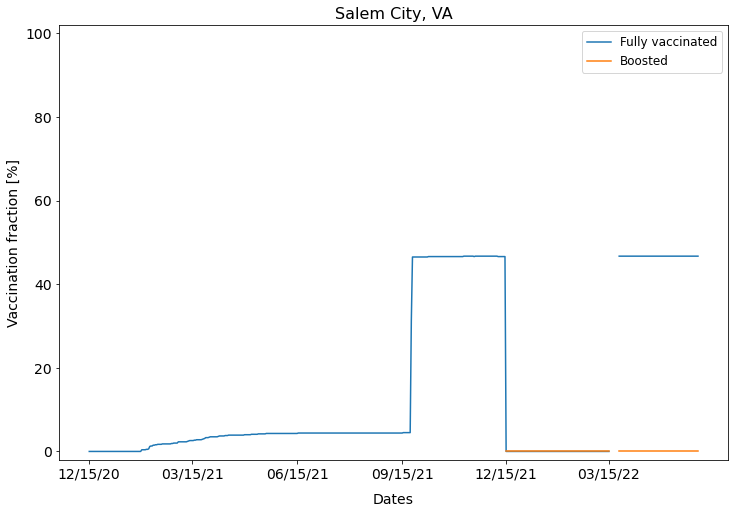

In [431]:
df_booster_min = df2.loc[df2['FIPS'] == '51775']

x = list(df_booster_min['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_min['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_min['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Salem City, VA", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
plt.savefig('salem_min_booster.png')

In [432]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK') & (df2['FIPS'] != '51775')]

In [433]:
df2_tmp.loc[df2_tmp['Booster_Doses_Vax_Pct'] == min(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
2448,06/01/2022,51735,22,Poquoson city,VA,79.0,6059.0,49.4,6059.0,51.8,...,1.0,1.0,1.0,1.0,12271.0,11690.0,2166.0,10617.0,9524.0,2402.0


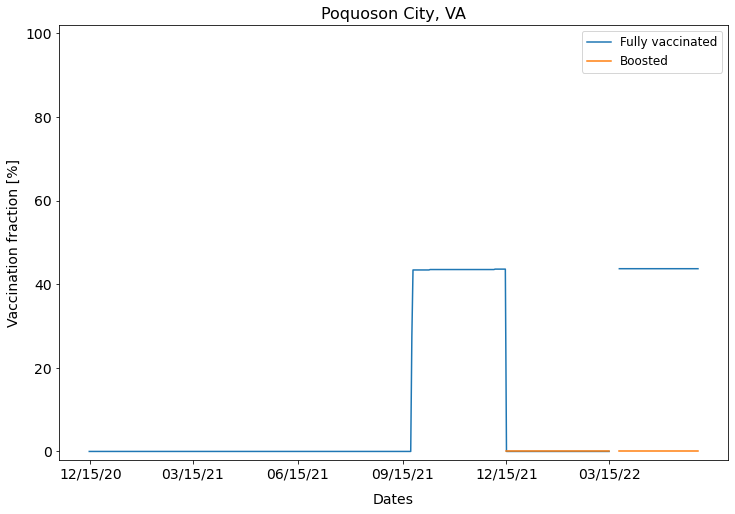

In [434]:
df_booster_min = df2.loc[df2['FIPS'] == '51735']

x = list(df_booster_min['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_min['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_min['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Poquoson City, VA", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig('poquoson_min_booster.png')

In [435]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK') & (df2['FIPS'] != '51775') & (df2['Recip_State'] != 'VA')]

In [436]:
df2_tmp.loc[df2_tmp['Booster_Doses_Vax_Pct'] == min(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
1516,06/01/2022,13053,22,Chattahoochee County,GA,89.4,30827.0,95.0,30825.0,95.0,...,1.0,1.0,1.0,2.0,10907.0,9947.0,1500.0,8952.0,8447.0,530.0


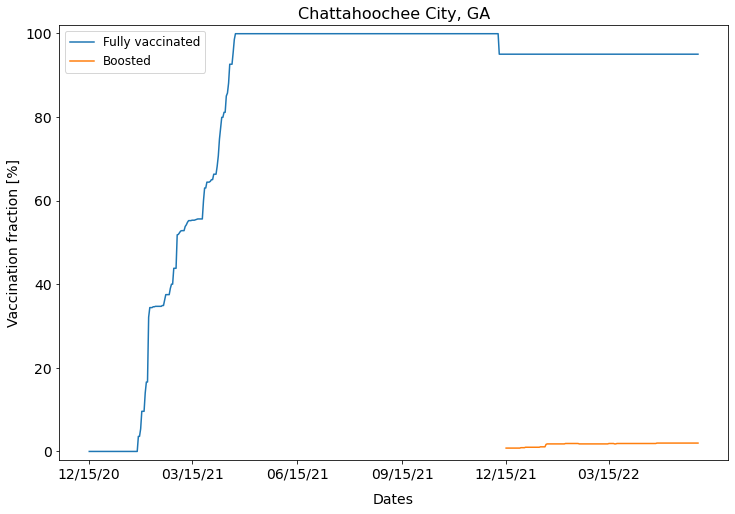

In [450]:
df_booster_min = df2.loc[df2['FIPS'] == '13053']

x = list(df_booster_min['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_min['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_min['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Chattahoochee City, GA", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
#plt.savefig('chattahoochee_min_booster.png')

In [439]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK') & (df2['FIPS'] != '13053') & (df2['Recip_State'] != 'VA')]

In [440]:
df2_tmp.loc[df2_tmp['Booster_Doses_Vax_Pct'] == min(df2_tmp['Booster_Doses_Vax_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
2813,06/01/2022,37133,22,Onslow County,NC,96.9,154507.0,78.1,154476.0,85.4,...,1.0,1.0,1.0,1.0,197938.0,180787.0,31444.0,162055.0,149343.0,19026.0


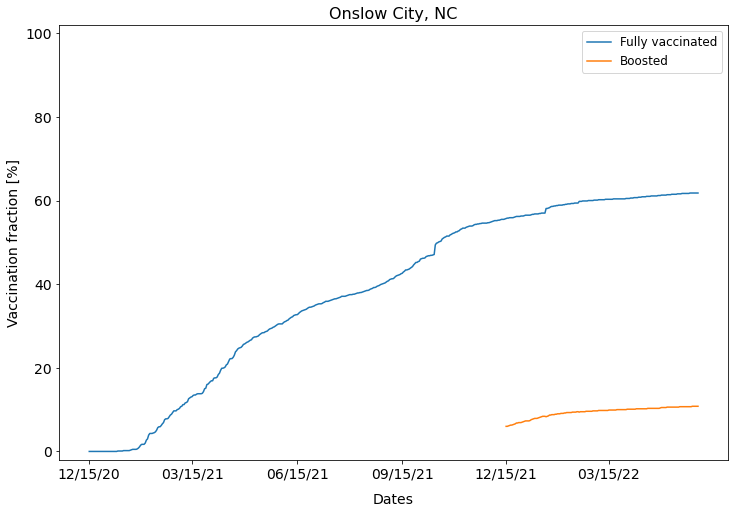

In [441]:
df_booster_min = df2.loc[df2['FIPS'] == '37133']

x = list(df_booster_min['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_booster_min['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_booster_min['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.ylim([-2, 102])
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Onslow City, NC", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [442]:
df2_tmp.loc[df2_tmp['Series_Complete_Pop_Pct'] == max(df2_tmp['Series_Complete_Pop_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
326,06/01/2022,48427,22,Starr County,TX,98.9,85783.0,95.0,85687.0,95.0,...,5.0,6.0,7.0,7.0,64633.0,58541.0,15004.0,50136.0,43537.0,7370.0
822,06/01/2022,48377,22,Presidio County,TX,98.9,8845.0,95.0,8842.0,95.0,...,7.0,7.0,7.0,6.0,6704.0,6193.0,1288.0,5475.0,4905.0,1601.0
1008,06/01/2022,04001,22,Apache County,AZ,97.7,89457.0,95.0,89438.0,95.0,...,7.0,8.0,8.0,7.0,71887.0,67054.0,14592.0,59355.0,52462.0,11334.0
1078,06/01/2022,08111,22,San Juan County,CO,97.1,785.0,95.0,785.0,95.0,...,8.0,8.0,8.0,7.0,728.0,701.0,64.0,668.0,637.0,188.0
1498,06/01/2022,72049,22,Culebra Municipio,PR,97.3,1940.0,95.0,1940.0,95.0,...,8.0,8.0,8.0,6.0,1714.0,1647.0,236.0,1529.0,1411.0,391.0
1726,06/01/2022,06025,22,Imperial County,CA,97.6,239772.0,95.0,239306.0,95.0,...,3.0,3.0,3.0,3.0,181215.0,166690.0,37075.0,146254.0,129615.0,24137.0
1912,06/01/2022,72081,22,Lares Municipio,PR,97.3,26733.0,95.0,26731.0,95.0,...,4.0,4.0,4.0,3.0,24276.0,23348.0,3361.0,21651.0,19987.0,5231.0
2451,06/01/2022,02060,22,Bristol Bay Borough,AK,97.5,1085.0,95.0,1085.0,95.0,...,6.0,6.0,6.0,8.0,836.0,778.0,91.0,720.0,687.0,136.0
2506,06/01/2022,48323,22,Maverick County,TX,98.9,84376.0,95.0,84351.0,95.0,...,6.0,6.0,6.0,6.0,58722.0,53388.0,12841.0,46539.0,40547.0,7003.0
2630,06/01/2022,04023,22,Santa Cruz County,AZ,97.7,75579.0,95.0,75566.0,95.0,...,6.0,7.0,7.0,7.0,46498.0,43279.0,9156.0,38439.0,34123.0,8591.0


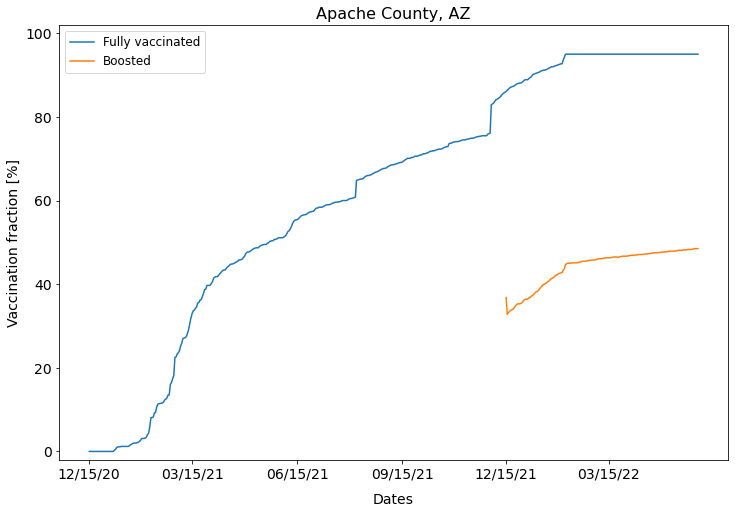

In [443]:
df_full_max = df2.loc[df2['FIPS'] == '04001']

x = list(df_full_max['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_full_max['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_full_max['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Apache County, AZ", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.ylim([-2, 102])
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [444]:
df2_tmp.loc[df2_tmp['Series_Complete_Pop_Pct'] == min(df2_tmp['Series_Complete_Pop_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
1339,06/01/2022,38087,22,Slope County,ND,92.7,109.0,14.5,108.0,15.3,...,7.0,7.0,7.0,6.0,750.0,705.0,107.0,646.0,598.0,178.0


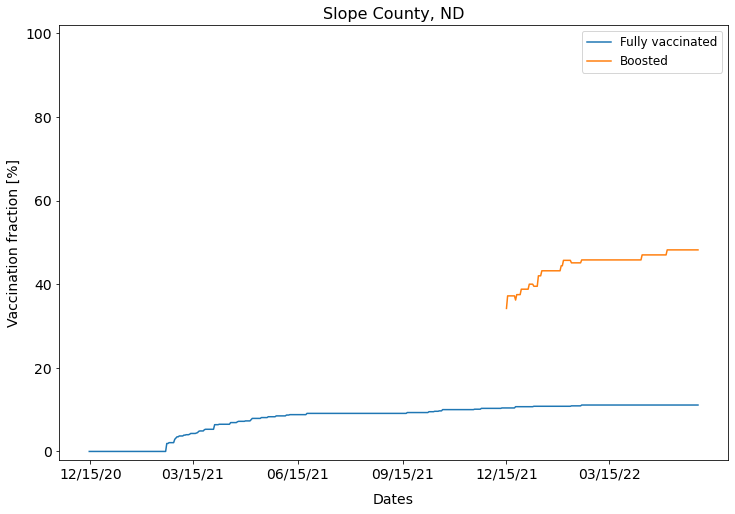

In [445]:
df_full_min = df2.loc[df2['FIPS'] == '38087']

x = list(df_full_min['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_full_min['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_full_min['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Slope County, ND", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.ylim([-2, 102])
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [446]:
df2_tmp = df2.loc[(df2['Date'] == '06/01/2022') & (df2['FIPS'] != 'UNK') & (df2['Series_Complete_Pop_Pct'] > df2['Booster_Doses_Vax_Pct'])]

In [447]:
df2_tmp.loc[df2_tmp['Series_Complete_Pop_Pct'] == min(df2_tmp['Series_Complete_Pop_Pct'].values)]

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
1178,06/01/2022,51680,22,Lynchburg city,VA,79.0,29274.0,35.6,29272.0,38.0,...,1.0,1.0,1.0,1.0,82168.0,76973.0,10734.0,71171.0,66239.0,11906.0


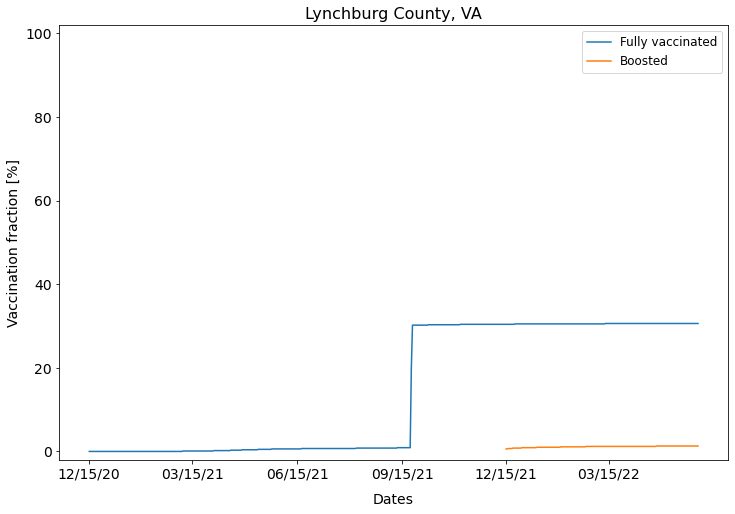

In [449]:
df_full_min = df2.loc[df2['FIPS'] == '51680']

x = list(df_full_min['Date'].values)
x.reverse()
x_tmp = list()
for d in x:
    day, month, year = d.split("/")
    x_tmp.append(day + "/" + month + "/" + year[2:])
x = x_tmp
y = list(df_full_min['Series_Complete_Pop_Pct'].values)
y.reverse()
y2 = list(df_full_min['Booster_Doses_Vax_Pct'].values)
y2.reverse()
plt.plot(x, y, label = "Fully vaccinated")
plt.plot(x, y2, label = "Boosted")

plt.title("Lynchburg County, VA", fontsize=16)
plt.ylabel("Vaccination fraction [%]", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.legend(fontsize=12)
plt.ylim([-2, 102])
plt.xticks(['12/15/20', '03/15/21', '06/15/21', '09/15/21', '12/15/21','03/15/22'], fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()